<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
!pip install gdown

In [ ]:
# !gdown --folder https://drive.google.com/drive/folders/1c50Q5RcmdpMYj1jCPc3ShOE2y4G8G2ez

Retrieving folder list
Retrieving folder 1pEBmIl1tbuwYrsfeUv2KDz8a2gR0Fjxe data
Retrieving folder 1ONG0P5YAMlkzyKB7VugPKtLs9fXcdmRx after_eda
Processing file 1XNxqMI6qyXYhi2XVVRIxqD11hKgh2oja missing_edges_final.p
Processing file 1_KN7S8zfHdrkRjRYOEtBxBVq8JrGxPXD test_after_eda.csv
Processing file 1yynFkCz80RcbTgPylw8cdZ37qEsfxmGV test_neg_after_eda.csv
Processing file 1yldY87HoO-XyfCJqyFqyi7QKeJkhMXgB test_pos_after_eda.csv
Processing file 1lcxzVZ0-MkPmoH3lS35Q8rRfrecKSXb1 train_after_eda.csv
Processing file 1qNhcor22jE5gJ_NfKATx_18oKYOKPy7_ train_neg_after_eda.csv
Processing file 1XLHsIRXKLx9TA9nuC1SS7JDkLyRVmo69 train_pos_after_eda.csv
Processing file 1c5omWa9D1b4iQ28tiDfMs4wglhKKLA9X train_woheader.csv
Retrieving folder 1qYtDPghLMT6rv3xd7NmQUSUKWwCS5375 fea_sample
Processing file 1YVVHZvqfopWwLeAdIu5-oHGocS7CmCZR hits.p
Processing file 1Xp7QmNsdVF6BN0IumLGlfUOyr3IAJyjn katz.p
Processing file 1hp-5BFw9xK1WmovBW17T5POa1BbGSk9N page_rank.p
Processing file 1pIO_nOg9XU0WUD10brRvrgyUXbY5

In [ ]:
# !wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

--2022-05-20 12:09:49--  https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr
Resolving doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-05-20 12:09:49 ERROR 403: Forbidden.



In [ ]:
! pwd
%cd /content/Facebook/data/fea_sample/Facebook/data/fea_sample

/content/Facebook/data/fea_sample
/content/Facebook/data/fea_sample/Facebook/data/fea_sample


In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
type(df_final_train)

pandas.core.frame.DataFrame

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

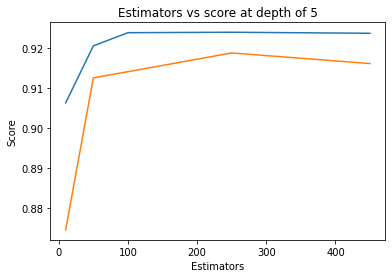

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


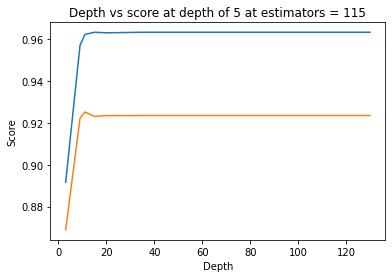

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)
# https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
rf_random.fit(df_final_train,y_train)


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d909f9350>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d90a60b50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d909cfcd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2d909e9910>},
                   random_state=25, return_train_score=True, scoring='f1')

In [ ]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225042 0.96215492 0.9605708  0.96194014 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


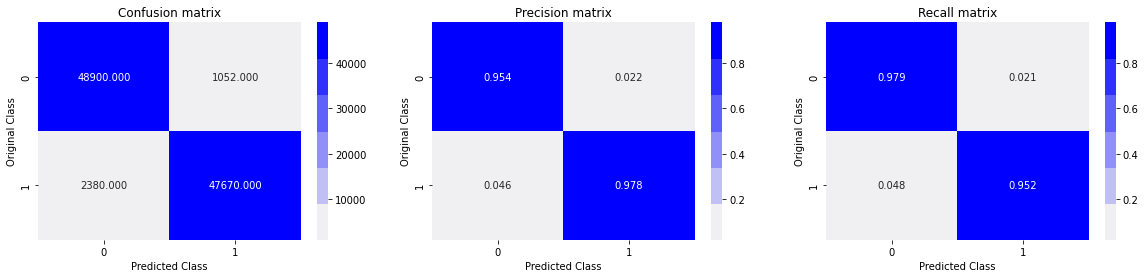

Test confusion_matrix


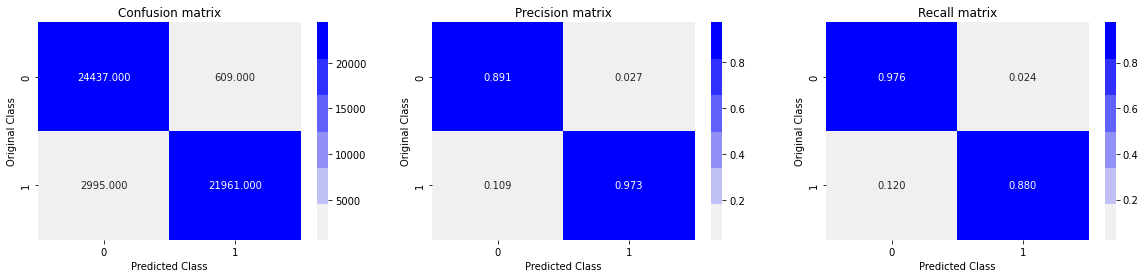

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

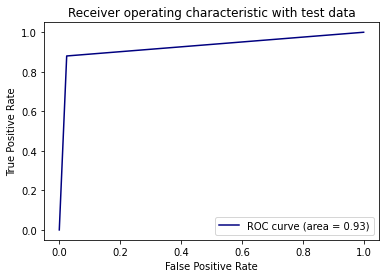

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

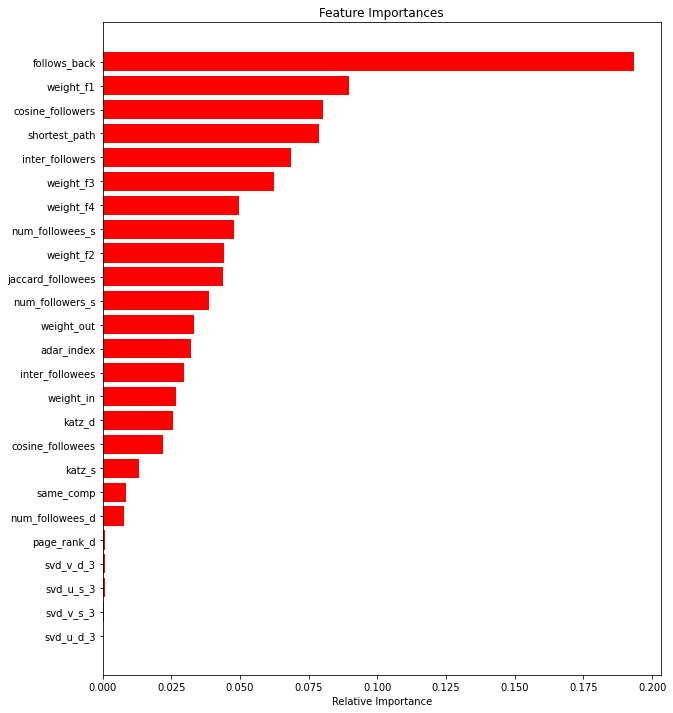

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [61]:
from google.colab import drive
drive.mount('/content/gdrive/')
! pwd
%cd /content/gdrive/My\ Drive/Assignments\ AAIC/Assignment\ 17\ FB\ Friend\ Recommendation

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation
/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation


In [62]:
if os.path.isfile('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Facebook/data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Facebook/data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

DiGraph with 1780722 nodes and 7550015 edges


In [75]:
#reading
from pandas import read_hdf
!pwd
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

/content/gdrive/MyDrive/Assignments AAIC/Assignment 17 FB Friend Recommendation


In [76]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

<font color='red'><h1>Note:- It seems num_follower_d feature is missing from the storage_sample_stage4, so we'll have to add it.

In [77]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

<font color='red'><h2> 1. Adding Preferential Attachment 


<img src= 'https://drive.google.com/uc?id=1WtI6j3dO__V0oQzdtWk3EGXWEZtCCKIc'>

In [95]:
def compute_features_stage5(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[] 
    # See if node in Train or Test 
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node'])) # source followers 
            s2=set(train_graph.successors(row['source_node'])) # people following source
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set() 
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_d

In [86]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [97]:
df_final_train['num_followers_d']= compute_features_stage5(df_final_train)
df_final_test['num_followers_d'] = compute_features_stage5(df_final_test)

In [98]:
! pwd
%cd  /content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/

/content/gdrive/MyDrive/Assignments AAIC/Assignment 17 FB Friend Recommendation
/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation


In [99]:
# Create a file storage sample Stage 5 and add Two New Features ie Preferential Attachment and svd_dot
if not os.path.isfile('storage_sample_stage5.h5'):
    #mapping Preferential Attachment on train ie followers of source * followers of destination
    df_final_train['preferential'] = df_final_train.apply(lambda row: row['num_followers_s']* row['num_followers_d'],axis=1)
    #mapping adar index on test
    df_final_test['preferential'] = df_final_test.apply(lambda row: row['num_followers_s']*row['num_followers_d'],axis=1)

    #-------------------------------------------------------------------------------------------------------
    
    hdf = HDFStore('storage_sample_stage5.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else: # directly read a file
    df_final_train = read_hdf('storage_sample_stage5.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage5.h5', 'test_df',mode='r')

In [101]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential'],
      dtype='object')

<font color='blue' size=5> Add svd_dot Feature

<img src= 'https://drive.google.com/uc?id=18MAvImOkCToBXFVn1SP8hG7sKhD9wOms'>

In [103]:
#mapping svd_dot on train
# [[ ]] is used to get Multiple rows https://stackoverflow.com/questions/49629992/how-to-select-multiple-rows-in-a-pandas-column-to-create-a-new-dataframe

df_final_train['svd_dot_u']=df_final_train.apply(lambda row:np.dot(row[['svd_u_s_1','svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']], 
                                                                    row[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']]),axis=1)
df_final_train['svd_dot_v']=df_final_train.apply(lambda row:np.dot(row[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']],
                                                                    row[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']]),axis=1)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#mapping svd_dot on test
df_final_test['svd_dot_u']=df_final_test.apply(lambda row:np.dot(row[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']],
                                                                  row[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6']]),axis=1)
df_final_test['svd_dot_v']=df_final_test.apply(lambda row:np.dot(row[['svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']],
                                                                  row[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']]),axis=1)

In [104]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential', 'svd_dot_u', 'svd_dot_v'],
      dtype='object')

In [105]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [106]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib
# create an iterator object with write permission - model.pkl
with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/df_final_train', 'wb') as files:
    joblib.dump(df_final_train, files)
with open('//content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/df_final_test', 'wb') as files:
    joblib.dump(df_final_test, files)

In [107]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib
with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/df_final_train' , 'rb') as f:
    df_final_train = joblib.load(f)
with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/df_final_test' , 'rb') as f:
    df_final_test = joblib.load(f)

In [108]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9171013764062598 test Score 0.9039679681376184
Estimators =  50 Train Score 0.9206451345068084 test Score 0.8982537834691502
Estimators =  100 Train Score 0.9214043507746883 test Score 0.9159700835899691
Estimators =  250 Train Score 0.9215133283195456 test Score 0.9135973763874874
Estimators =  450 Train Score 0.9218142277612814 test Score 0.9142255892255893


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

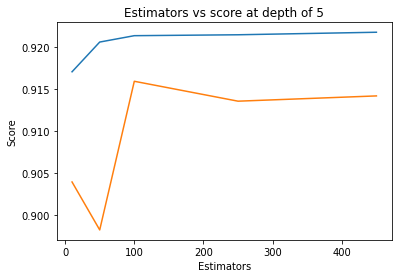

In [109]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9105867070794544 test Score 0.8949359416473341
depth =  9 Train Score 0.9549922928512365 test Score 0.9207133058984912
depth =  11 Train Score 0.9606396939886264 test Score 0.9222154132240137
depth =  15 Train Score 0.9636245665970519 test Score 0.9202096187980728
depth =  20 Train Score 0.9638757048395602 test Score 0.924450809831715
depth =  35 Train Score 0.9640206060114388 test Score 0.926338816204619
depth =  50 Train Score 0.9640206060114388 test Score 0.926338816204619
depth =  70 Train Score 0.9640206060114388 test Score 0.926338816204619
depth =  130 Train Score 0.9640206060114388 test Score 0.926338816204619


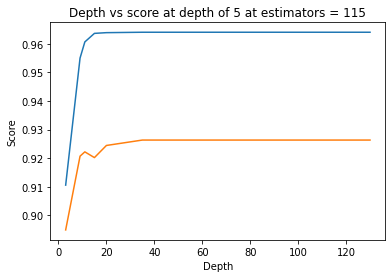

In [110]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [111]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=5,scoring='f1',random_state=25, return_train_score=True)
# https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
rf_random.fit(df_final_train,y_train)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe6544590d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe65442f110>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe654735ed0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe654459650>},
                   random_state=25, return_train_score=True, scoring='f1')

In [115]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96230888 0.96147798 0.95999725 0.96116579 0.96358315]
mean train scores [0.96310402 0.96222188 0.96046293 0.96187631 0.96451912]


In [116]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [117]:
rf_random = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [126]:
rf_random.fit(df_final_train,y_train)
y_train_pred = rf_random.predict(df_final_train)
y_test_pred = rf_random.predict(df_final_test)

In [127]:
! pwd
%cd /content/gdrive/My\ Drive/Assignments\ AAIC/Assignment\ 17\ FB\ Friend \Recommendation

/content/gdrive/MyDrive/Assignments AAIC/Assignment 17 FB Friend Recommendation
/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation


In [128]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib

with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Final/rf_random', 'wb') as files:
    pickle.dump(rf_random, files)

In [129]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib
with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Final/rf_random', 'rb') as f:
    rf_random = joblib.load(f)

In [130]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.964021775493446
Test f1 score 0.9236902050113895


In [131]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


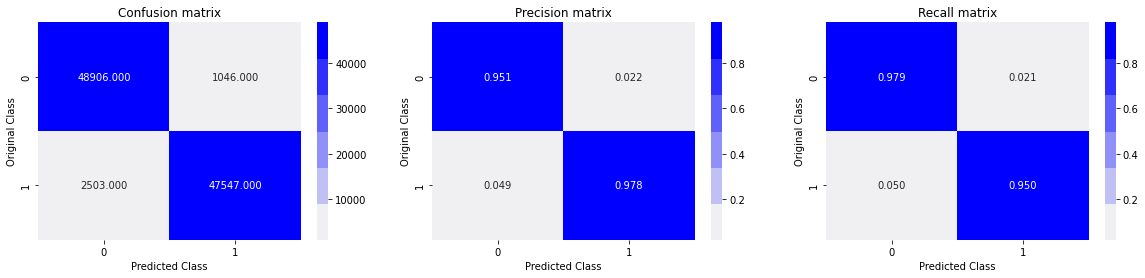

Test confusion_matrix


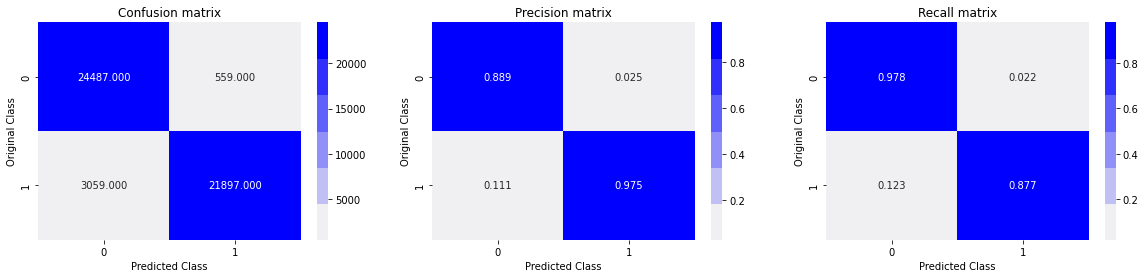

In [132]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

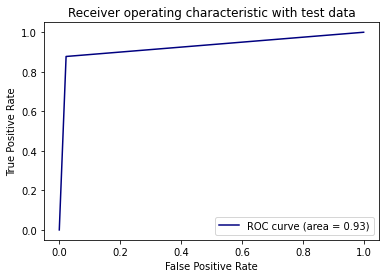

In [133]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

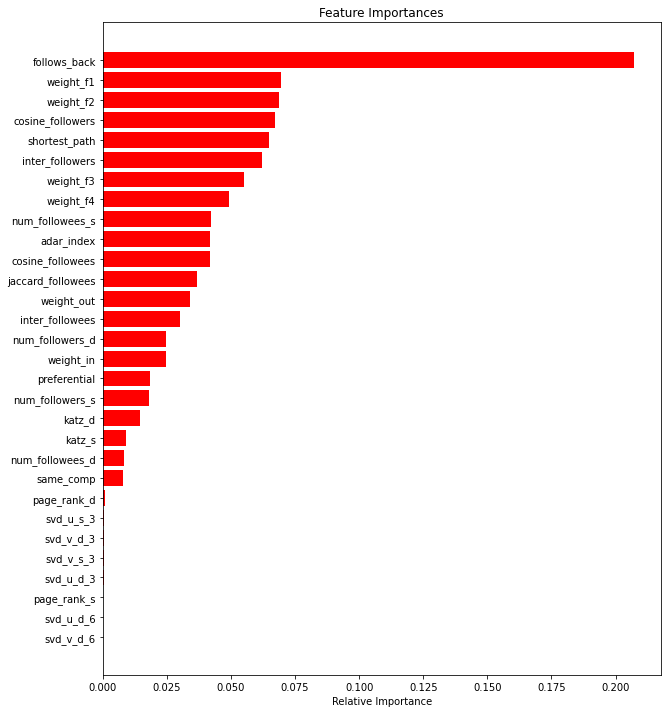

In [134]:
features = df_final_train.columns
importances = rf_random.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color='blue'> <h1> Applying XGBoost Model

In [135]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,make_scorer


xgb_model = xgb.XGBClassifier() # Default params 
params= {"max_depth": [1, 2, 4, 6], "n_estimators": [5, 20,50]}
gbdt = RandomizedSearchCV(xgb_model,params, n_iter=5, scoring='f1', cv=3, return_train_score=True, n_jobs=-1) # running 3 fold cross validation grid search
gbdt.fit(df_final_train,y_train) #fitting

RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 6],
                                        'n_estimators': [5, 20, 50]},
                   return_train_score=True, scoring='f1')

In [136]:
print('mean test scores',gbdt.cv_results_['mean_test_score'])
print('mean train scores',gbdt.cv_results_['mean_train_score'])

mean test scores [0.92064807 0.9212666  0.90939362 0.93393896 0.91944166]
mean train scores [0.92060962 0.92122149 0.91019882 0.93484829 0.91996065]


In [137]:
print(gbdt.best_estimator_)

XGBClassifier(max_depth=4, n_estimators=20)


In [138]:
gbdt = xgb.XGBClassifier(base_score=0.5, max_depth=10, min_child_weight=1, missing=None, n_estimators=109,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0, silent=True, subsample=1)

gbdt.fit(df_final_train,y_train)
y_train_pred = gbdt.predict(df_final_train)
y_test_pred = gbdt.predict(df_final_test)

In [139]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9913109863286155
Test f1 score 0.9279925319302413


In [140]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib

with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Final/gbdt', 'wb') as files:
    pickle.dump(gbdt, files)

In [141]:
#As running these files takes a lot of time, so storing them in joblib file
import joblib
with open('/content/gdrive/My Drive/Assignments AAIC/Assignment 17 FB Friend Recommendation/Final/gbdt', 'rb') as f:
    gbdt = joblib.load(f)

In [142]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


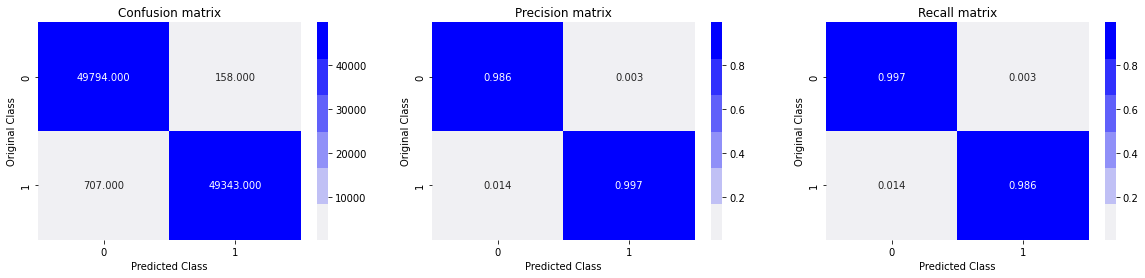

Test confusion_matrix


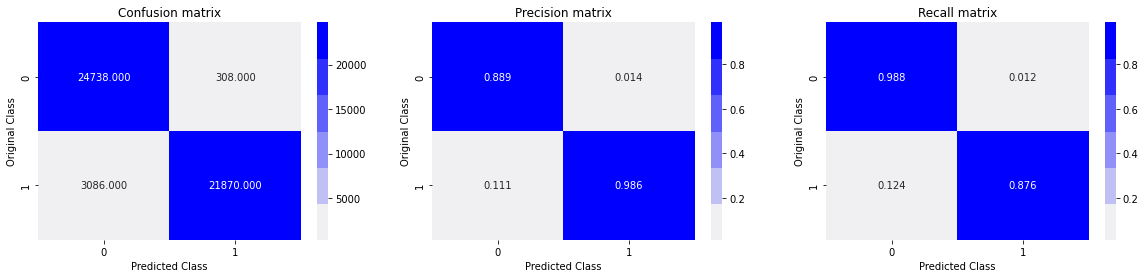

In [143]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

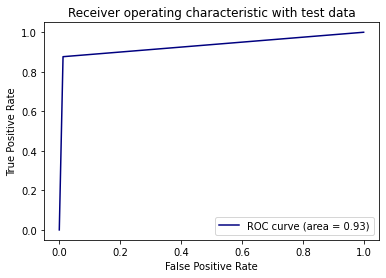

In [144]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

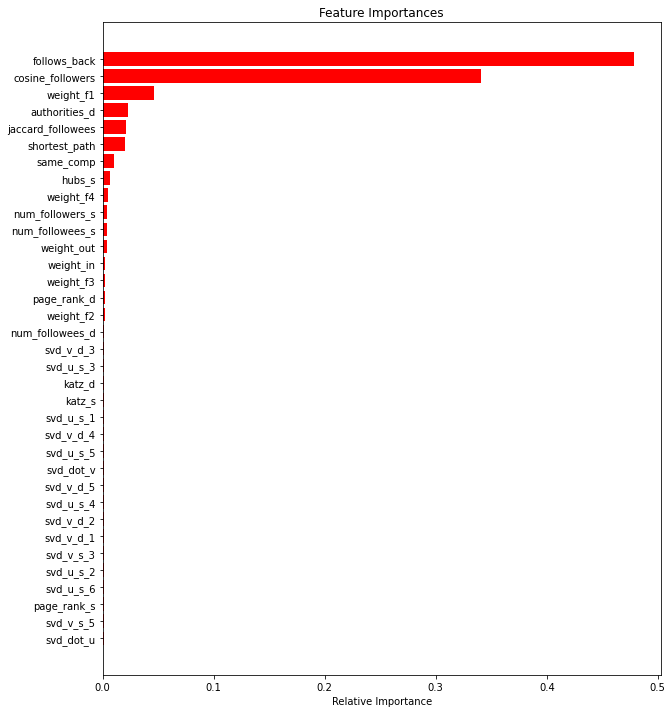

In [146]:
features = df_final_train.columns
importances = gbdt.feature_importances_
indices = (np.argsort(importances))[-35:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color='blue'><h1>3.  Summary:- 

In [147]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = [ "Set.No","Model", "With or without Preferential and SVD_dot", "Hyper Parameters", "Test-AUC"]  # http://zetcode.com/python/prettytable/
table.add_row([1,"Random Forest", "Without Preferential and SVD_dot", "max_depth =14 , n_estimator=121", 0.9241678239279553])
table.add_row([2, "Random Forest", "With Preferential and SVD_dot" ,"max_depth =14 , n_estimator=121", 0.9236902050113895])
table.add_row([3, "XGBoost", "With Preferential and SVD_dot" ,"max_depth =6 , n_estimator=5", 0.9279925319302413])

print(table)

+--------+---------------+------------------------------------------+---------------------------------+--------------------+
| Set.No |     Model     | With or without Preferential and SVD_dot |         Hyper Parameters        |      Test-AUC      |
+--------+---------------+------------------------------------------+---------------------------------+--------------------+
|   1    | Random Forest |     Without Preferential and SVD_dot     | max_depth =14 , n_estimator=121 | 0.9241678239279553 |
+--------+---------------+------------------------------------------+---------------------------------+--------------------+
|   2    | Random Forest |      With Preferential and SVD_dot       | max_depth =14 , n_estimator=121 | 0.9236902050113895 |
+--------+---------------+------------------------------------------+---------------------------------+--------------------+
|   3    |    XGBoost    |      With Preferential and SVD_dot       |   max_depth =6 , n_estimator=5  | 0.9279925319302413 |


<font color='blue'><h1>4. Conclusion:-</h1><h2>
Adding Preferential Attachments, Svd_dot and applying XGBoost Model won't result in any substantial difference in the Performance of the Model
</font>